<a href="https://colab.research.google.com/github/vinothalagupandi/keras-tf/blob/master/classroom-practice/simple_neural_network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

physical_devices = tf.config.list_physical_devices('GPU')
print('Physical Devices', physical_devices)
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Physical Devices []


In [104]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [89]:
x_train.shape

(60000, 28, 28)

In [105]:
x_train = x_train.astype('float32') /  255.
x_test = x_test.astype('float32') /  255.

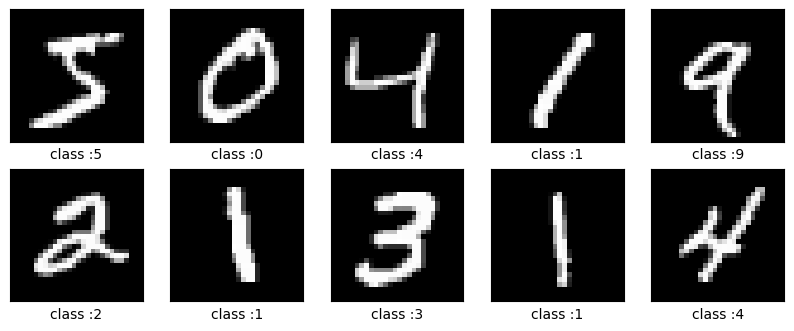

In [106]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.xlabel(f"class :{y_train[i]}")
plt.show()


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [107]:

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [108]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10,activation="sigmoid")
])

In [109]:
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [110]:
history= model.fit(x_train, y_train,batch_size=32, epochs=5, validation_data=(x_test, y_test),verbose=2)

Epoch 1/5
1875/1875 - 13s - loss: 0.2743 - accuracy: 0.6093 - val_loss: 0.1849 - val_accuracy: 0.7940 - 13s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 12s - loss: 0.1526 - accuracy: 0.8218 - val_loss: 0.1245 - val_accuracy: 0.8578 - 12s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 12s - loss: 0.1144 - accuracy: 0.8580 - val_loss: 0.1004 - val_accuracy: 0.8751 - 12s/epoch - 6ms/step
Epoch 4/5
1875/1875 - 12s - loss: 0.0965 - accuracy: 0.8761 - val_loss: 0.0868 - val_accuracy: 0.8908 - 12s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 12s - loss: 0.0857 - accuracy: 0.8871 - val_loss: 0.0784 - val_accuracy: 0.8984 - 12s/epoch - 6ms/step


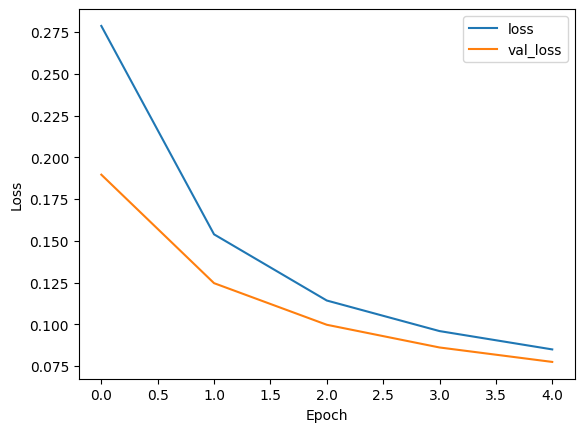

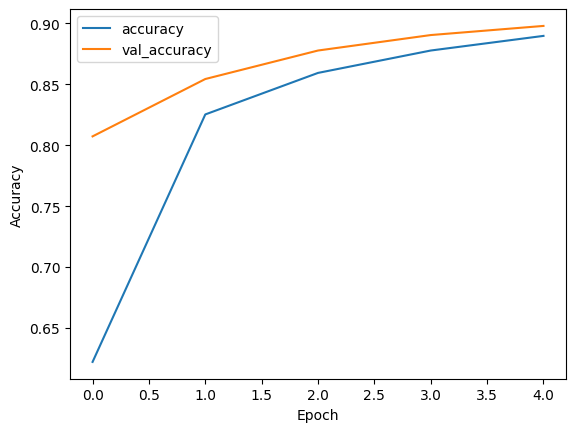

In [45]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [78]:
# prompt: sample single image prediction from test data and check the class with image plot

import matplotlib.pyplot as plt
import numpy as np

# Choose a random image from the test set
# index = np.random.randint(low=0, high=len(x_test))
index = 3049
test_image = x_test[index]
label = y_test[index]

# Predict the class of the image
predictions = model.predict(np.expand_dims(test_image, axis=0))
predictions = np.squeeze(predictions)
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
predicted_class = np.argmax(predictions)


1/1 [==============================] - 0s 61ms/step


3049

In [79]:
predictions

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

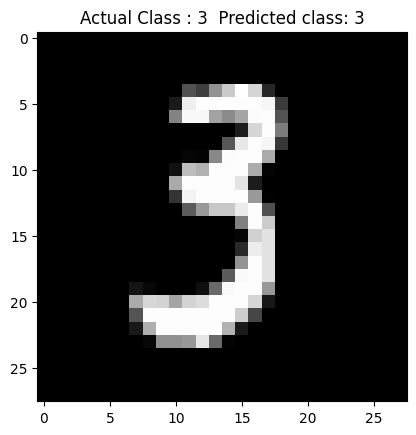

In [80]:
# Plot the image
plt.imshow(test_image.numpy().reshape(28, 28), cmap='gray')
plt.title(f"Actual Class : {np.argmax(label.numpy())}  Predicted class: {predicted_class}")
plt.show()
